# Exploratory Analysis Exercises

- Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle_excs as wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.shape

(67490, 25)

In [4]:
wrangle.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,0,0.0,67490


In [5]:
wrangle.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
bathrooms,0,0.0
bedrooms,0,0.0
buildingqualitytypeid,0,0.0
sq_footage,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
rawcensustractandblock,0,0.0
regionidcity,0,0.0


In [6]:
wrangle.summarize(df)



Dataframe head: 
|    |   bathrooms |   bedrooms |   buildingqualitytypeid |   sq_footage |   fips |    latitude |    longitude |   lotsizesquarefeet |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidzip |   roomcnt |   unitcnt |   yr_built |   structuretaxvaluedollarcnt |        tax_value |   assessmentyear |   landtaxvaluedollarcnt |   taxamount |   logerror | transactiondate   | heatingorsystemdesc   | propertylandusedesc       | county   |
|---:|------------:|-----------:|------------------------:|-------------:|-------:|------------:|-------------:|--------------------:|-------------------------:|---------------:|-----------------:|--------------:|----------:|----------:|-----------:|-----------------------------:|-----------------:|-----------------:|------------------------:|------------:|-----------:|:------------------|:----------------------|:--------------------------|:---------|
|  0 |         3.5 |          4 |                       6 |         3

(1649.558, 163698.1]      13222
(163698.1, 324142.2]      18299
(324142.2, 484586.3]      15893
(484586.3, 645030.4]       8908
(645030.4, 805474.5]       4872
(805474.5, 965918.6]       2723
(965918.6, 1126362.7]      1466
(1126362.7, 1286806.8]      989
(1286806.8, 1447250.9]      651
(1447250.9, 1607695.0]      467
Name: tax_value, dtype: int64
(2013.983, 2014.387]        0
(2014.387, 2014.79]         0
(2014.79, 2015.194]         0
(2015.194, 2015.597]        0
(2015.597, 2016.0]      67490
(2016.0, 2016.403]          0
(2016.403, 2016.806]        0
(2016.806, 2017.21]         0
(2017.21, 2017.613]         0
(2017.613, 2018.016]        0
Name: assessmentyear, dtype: int64
(-1371.691, 153430.0]     28122
(153430.0, 306699.0]      19109
(306699.0, 459968.0]      10846
(459968.0, 613237.0]       5103
(613237.0, 766506.0]       2201
(766506.0, 919775.0]       1117
(919775.0, 1073044.0]       567
(1073044.0, 1226313.0]      317
(1226313.0, 1379582.0]       91
(1379582.0, 1532851.0]     

In [7]:
df = df.rename(columns = { 'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'sq_footage',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'yr_built'
                             }) 

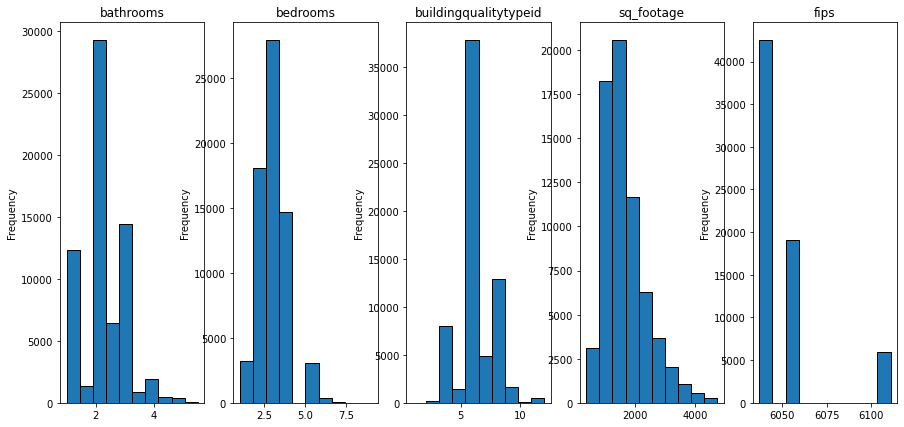

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(15, 7))

for ax, col in zip(axs, df.select_dtypes('number')):
    df[col].plot.hist(ax=ax, title=col, ec='black')

In [9]:
#Binning square footage for comparison and visualization purposes
df['sq_footage_bins'] = pd.cut(df.sq_footage, [0, 1000, 2000,3000,4000, 10000])
df.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,sq_footage_bins
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,None,Single Family Residential,Orange,"(3000, 4000]"
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,None,Single Family Residential,Ventura,"(1000, 2000]"
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,None,Single Family Residential,Orange,"(1000, 2000]"
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Single Family Residential,Los Angeles,"(2000, 3000]"
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central,Condominium,Los Angeles,"(1000, 2000]"


### Before exploring data further, will need to split data into train, validate and test so that we only explore on train.

In [10]:
train, validate, test = wrangle.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((40494, 26), (13498, 26), (13498, 26))

### Question 1.  Does log error differ across square feet?

<AxesSubplot:title={'center':'Is there a relationship between logerror and square feet?'}, xlabel='logerror', ylabel='sq_footage'>

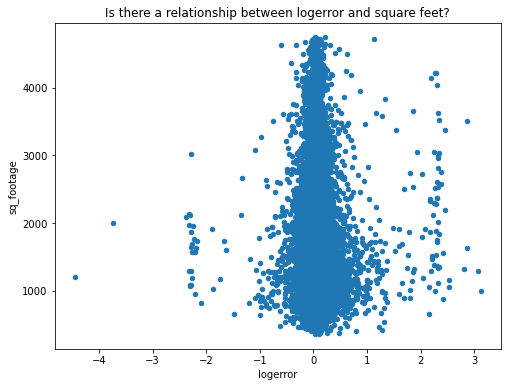

In [11]:
train.plot.scatter(
    x="logerror",
    y="sq_footage",
    title='Is there a relationship between logerror and square feet?',
    figsize=(8, 6),
)

<AxesSubplot:>

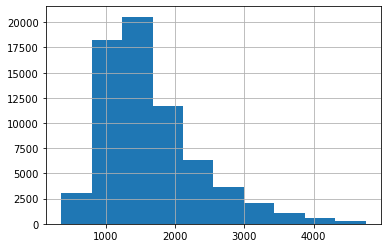

In [12]:
df.sq_footage.hist()

<AxesSubplot:title={'center':'Distribution of sq_footage_bin'}>

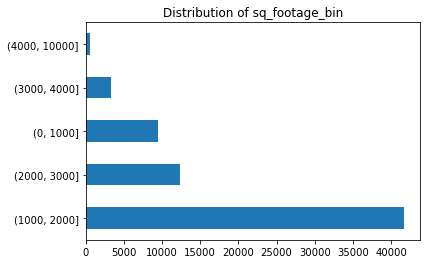

In [13]:
df.sq_footage_bins.value_counts().plot.barh(title='Distribution of sq_footage_bin')

<AxesSubplot:xlabel='sq_footage_bins', ylabel='logerror'>

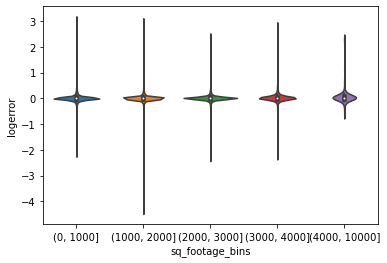

In [14]:
sns.violinplot(data=train, y='logerror', x='sq_footage_bins')

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the square footage

$H_a$: there is a difference in logerror variance between the square footage

In [15]:
stats.levene(
    train[train.sq_footage <= 1000].logerror,
    train[train.sq_footage > 1000].logerror,
)

LeveneResult(statistic=26.421381823118583, pvalue=2.7575885155652377e-07)

In [16]:
stats.levene(
    train[train.sq_footage <= 2000].logerror,
    train[train.sq_footage > 2000].logerror,
)

LeveneResult(statistic=0.9133570477417297, pvalue=0.339230966900938)

In [17]:
stats.levene(
    train[train.sq_footage <= 3000].logerror,
    train[train.sq_footage > 3000].logerror,
)

LeveneResult(statistic=33.21175253136165, pvalue=8.32476642871702e-09)

In [18]:
stats.levene(
    train[train.sq_footage <= 4000].logerror,
    train[train.sq_footage > 4000].logerror,
)

LeveneResult(statistic=26.208966386291532, pvalue=3.077963100113169e-07)

#### Conclusion:
We reject the null hypothesis that the variance in logerror is the same for all square footages.
The variance is not equal.

In [19]:
stats.ttest_ind(
    train[train.sq_footage <= 1000].logerror,
    train[train.sq_footage > 1000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-1.1795354395250444, pvalue=0.23822231653253545)

In [20]:
stats.ttest_ind(
    train[train.sq_footage <= 2000].logerror,
    train[train.sq_footage > 2000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-5.468852786673966, pvalue=4.6028033991275334e-08)

In [21]:
stats.ttest_ind(
    train[train.sq_footage <= 3000].logerror,
    train[train.sq_footage > 3000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-5.288640220586799, pvalue=1.3446342217119166e-07)

In [22]:
stats.ttest_ind(
    train[train.sq_footage <= 4000].logerror,
    train[train.sq_footage > 4000].logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-3.2396298227168385, pvalue=0.0013143037052781863)

### Conclusion:
We reject the null hypothesis that the logerror is the same for square footages above 1000 square feet.

### Question 2. Does  log error differ across county?


In [23]:
df.county.value_counts()

Los Angeles    42474
Orange         19108
Ventura         5908
Name: county, dtype: int64

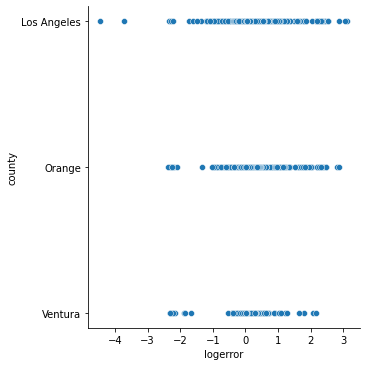

In [24]:
sns.relplot(data=train, x='logerror', y='county')

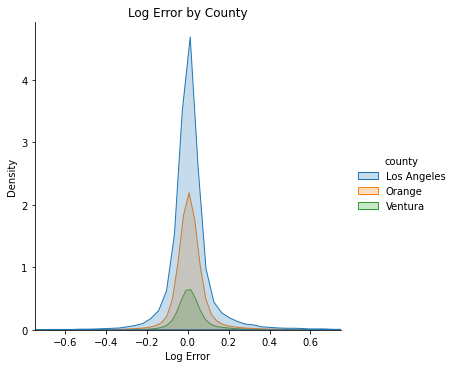

In [25]:
#Plotting distribution of log error by county

sns.displot(train, x='logerror', hue='county', kind='kde', fill=True)
plt.title('Log Error by County')
plt.xlabel('Log Error')
plt.xlim(-0.75, 0.75)
plt.show()

#### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the counties
 
𝐻𝑎 : there is a difference in logerror variance between the counties


In [26]:
stats.levene(
    train[train.county == 'Los Angeles'].logerror,
    train[train.county != 'Los Angeles'].logerror,
)

LeveneResult(statistic=25.420357603593807, pvalue=4.630126029827358e-07)

In [27]:
stats.levene(
    train[train.county == 'Ventura'].logerror,
    train[train.county != 'Ventura'].logerror,
)

LeveneResult(statistic=13.435255590635176, pvalue=0.0002472547032054955)

In [28]:
stats.levene(
    train[train.county == 'Orange'].logerror,
    train[train.county != 'Orange'].logerror,
)

LeveneResult(statistic=9.66021727850087, pvalue=0.0018843171405163632)

### Conclusion:
We reject the null hypothesis that the variance in logerror is the same for all counties.
The variance is not equal.

In [29]:
stats.ttest_ind(
    df.query('county == "Los Angeles"').logerror,
    df.query('county == "Orange"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-3.690124587002322, pvalue=0.0002245156221965261)

In [30]:
stats.ttest_ind(
    df.query('county == "Ventura"').logerror,
    df.query('county == "Orange"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-2.0580613382754938, pvalue=0.03960587164470629)

In [31]:
stats.ttest_ind(
    df.query('county == "Los Angeles"').logerror,
    df.query('county == "Ventura"').logerror,
    equal_var=False,
)

Ttest_indResult(statistic=-0.38916233430025177, pvalue=0.6971666541218813)

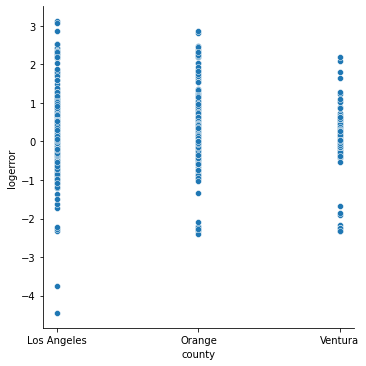

In [32]:
sns.relplot(data=train, y='logerror', x='county')

### Conclusion:
We reject the null hypothesis that the logerror is the same for all counties.

### Question 3. Does  log error differ across transaction date?

<AxesSubplot:title={'center':'Is there a relationship between logerror and transaction date?'}, xlabel='transactiondate', ylabel='logerror'>

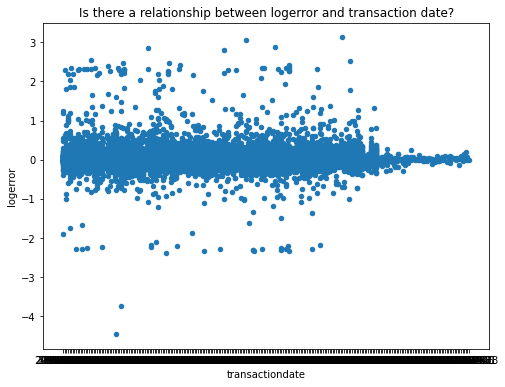

In [33]:
train.plot.scatter(
    y="logerror",
    x="transactiondate",
    title='Is there a relationship between logerror and transaction date?',
    figsize=(8, 6),
)

<AxesSubplot:>

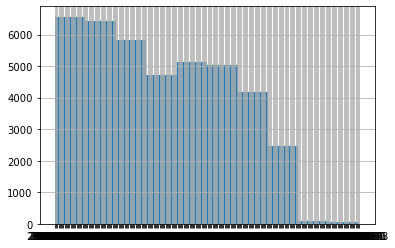

In [34]:
train.transactiondate.hist()

In [35]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'])
train['month'] = pd.DatetimeIndex(train['transactiondate']).month
train.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,sq_footage_bins,month
6378,1.0,3.0,4.0,1368.0,6037.0,34174813.0,-118512540.0,5899.0,6.037139e+07,12447.0,...,2016.0,414357.0,6417.40,0.211513,2017-01-30,Floor/Wall,Single Family Residential,Los Angeles,"(1000, 2000]",1
65133,2.0,4.0,8.0,2381.0,6037.0,34536607.0,-118049605.0,39349.0,6.037911e+07,40227.0,...,2016.0,122000.0,4191.95,0.018574,2017-08-10,Central,Single Family Residential,Los Angeles,"(2000, 3000]",8
45602,2.0,3.0,6.0,1810.0,6037.0,33824560.0,-118270268.0,5604.0,6.037544e+07,10723.0,...,2016.0,383000.0,6349.38,0.017428,2017-06-13,Floor/Wall,Single Family Residential,Los Angeles,"(1000, 2000]",6
75623,2.0,4.0,6.0,1558.0,6059.0,33791770.0,-118068568.0,8255.0,6.059110e+07,46314.0,...,2016.0,30142.0,1235.08,0.037663,2017-09-12,None,Single Family Residential,Orange,"(1000, 2000]",9
71792,2.0,4.0,6.0,1769.0,6111.0,34265339.0,-118798087.0,8090.0,6.111008e+07,27110.0,...,2016.0,359000.0,6301.48,0.029618,2017-08-30,None,Single Family Residential,Ventura,"(1000, 2000]",8


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40494 entries, 6378 to 40077
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   bathrooms                   40494 non-null  float64       
 1   bedrooms                    40494 non-null  float64       
 2   buildingqualitytypeid       40494 non-null  float64       
 3   sq_footage                  40494 non-null  float64       
 4   fips                        40494 non-null  float64       
 5   latitude                    40494 non-null  float64       
 6   longitude                   40494 non-null  float64       
 7   lotsizesquarefeet           40494 non-null  float64       
 8   rawcensustractandblock      40494 non-null  float64       
 9   regionidcity                40494 non-null  float64       
 10  regionidcounty              40494 non-null  float64       
 11  regionidzip                 40494 non-null  float64

In [37]:
#Binning transactiondate for comparison and visualization purposes
train['month_bins'] = pd.cut(train.month, [0,3,6,9,12])
train.head()

,bathrooms,bedrooms,buildingqualitytypeid,sq_footage,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,sq_footage_bins,month,month_bins
6378,1.0,3.0,4.0,1368.0,6037.0,34174813.0,-118512540.0,5899.0,6.037139e+07,12447.0,...,414357.0,6417.40,0.211513,2017-01-30,Floor/Wall,Single Family Residential,Los Angeles,"(1000, 2000]",1,"(0, 3]"
65133,2.0,4.0,8.0,2381.0,6037.0,34536607.0,-118049605.0,39349.0,6.037911e+07,40227.0,...,122000.0,4191.95,0.018574,2017-08-10,Central,Single Family Residential,Los Angeles,"(2000, 3000]",8,"(6, 9]"
45602,2.0,3.0,6.0,1810.0,6037.0,33824560.0,-118270268.0,5604.0,6.037544e+07,10723.0,...,383000.0,6349.38,0.017428,2017-06-13,Floor/Wall,Single Family Residential,Los Angeles,"(1000, 2000]",6,"(3, 6]"
75623,2.0,4.0,6.0,1558.0,6059.0,33791770.0,-118068568.0,8255.0,6.059110e+07,46314.0,...,30142.0,1235.08,0.037663,2017-09-12,None,Single Family Residential,Orange,"(1000, 2000]",9,"(6, 9]"
71792,2.0,4.0,6.0,1769.0,6111.0,34265339.0,-118798087.0,8090.0,6.111008e+07,27110.0,...,359000.0,6301.48,0.029618,2017-08-30,None,Single Family Residential,Ventura,"(1000, 2000]",8,"(6, 9]"


<AxesSubplot:title={'center':'Distribution of month_bin'}>

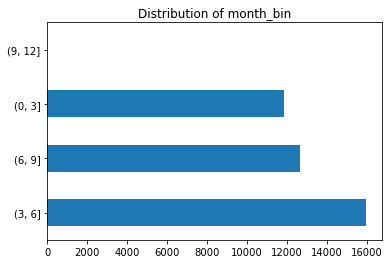

In [38]:
train.month_bins.value_counts().plot.barh(title='Distribution of month_bin')

<AxesSubplot:xlabel='month_bins', ylabel='logerror'>

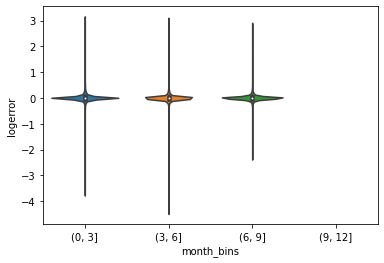

In [39]:
sns.violinplot(data=train, y='logerror', x='month_bins')

<AxesSubplot:title={'center':'Is there a relationship between logerror and month?'}, xlabel='month', ylabel='logerror'>

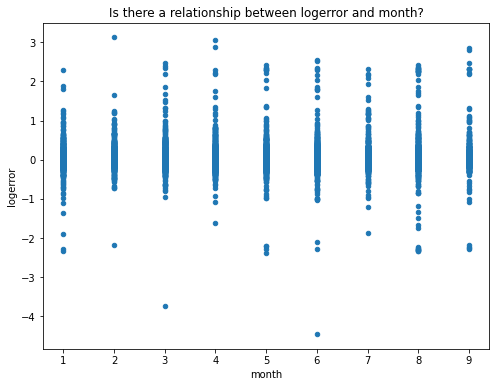

In [40]:
train.plot.scatter(
    y="logerror",
    x="month",
    title='Is there a relationship between logerror and month?',
    figsize=(8, 6),
)

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance between the transaction months before and after June

$H_a$: there is a difference in logerror variance between the transaction months before and after June

In [41]:
stats.levene(
    train[train.month <= 6].logerror,
    train[train.month > 6].logerror,
)

LeveneResult(statistic=0.23020178079501571, pvalue=0.6313768429384812)

In [42]:
# We fail to reject the null hypothesis that there is no difference in logerror variance between the 
#transaction months before and after June.  The variance is equal. 

### Are the log error and the month of the transaction independent of each other?

$H_0$ : The log error for sales in or before June is the same that logerror for sales after June.

$H_a$ : The log error for sales in or before June is the not same that logerror for sales after June.

In [43]:
stats.ttest_ind(
   train[train.month <= 6].logerror,
    train[train.month > 6].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-2.7771286250995333, pvalue=0.005486668073244086)

### Conclusion:
We reject the null hypothesis that tThe logerror for sales in or before June is the same that logerror for sales after June.he logerror for sales in or before June is the same that logerror for sales after June.

### Question 4.  If we control for month, does log error differ across county?
1. Viz logerror by county for each month bin

2. Analyze each month bin separately

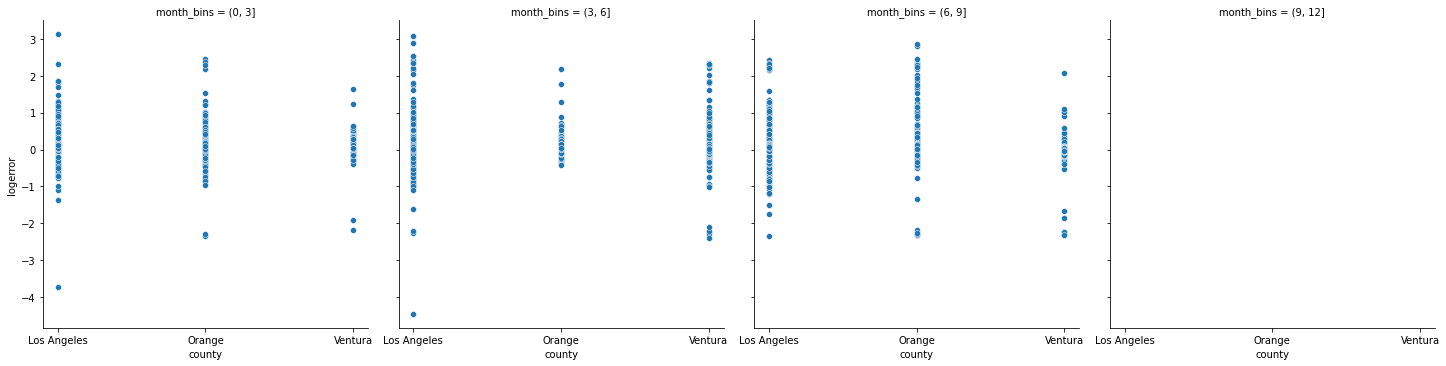

In [44]:
sns.relplot(data=train, y='logerror', x='county', col='month_bins')

In [45]:
# Logerror does not seem to vary much by month or county

Text(0.5, 1.0, 'Does county acccount for upper vs lower\nlogerror in square footage for sales before July?')

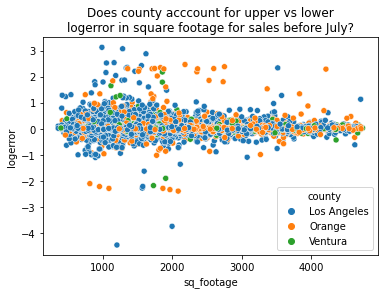

In [46]:
sns.scatterplot(
    x='sq_footage',
    y='logerror',
    data=train[train.month <= 6],
    hue='county',
)
plt.title("Does county acccount for upper vs lower\nlogerror in square footage for sales before July?")

Text(0.5, 1.0, 'Does county account for upper vs lower\n logerror in the square footage?')

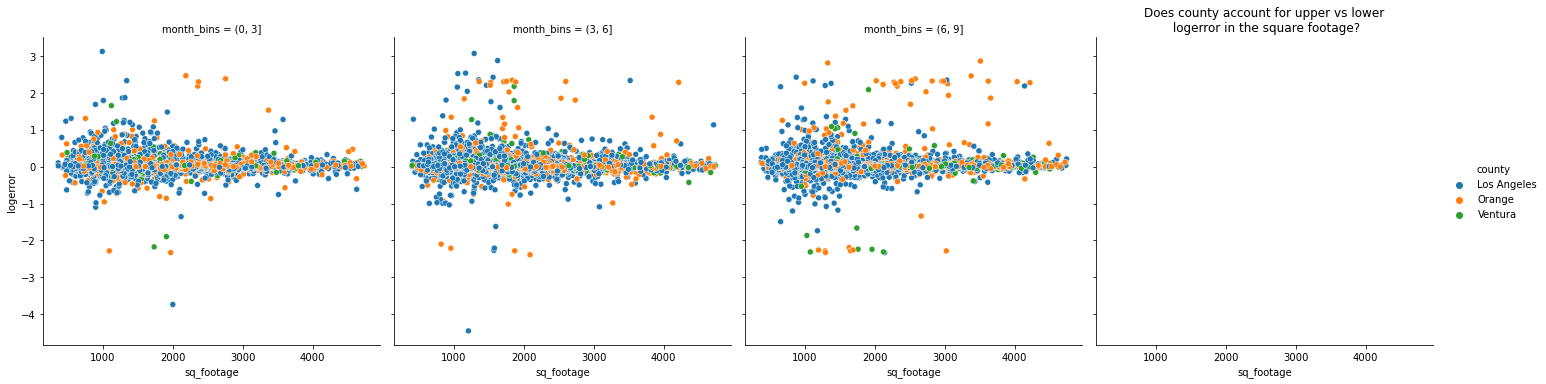

In [47]:
sns.relplot(
    x='sq_footage',
    y='logerror',
    data=train,
    hue='county',
    col='month_bins',
)
plt.title("Does county account for upper vs lower\n logerror in the square footage?")

Text(0.5, 1.0, 'Does county account for upper vs lower\n logerror in the square footage?')

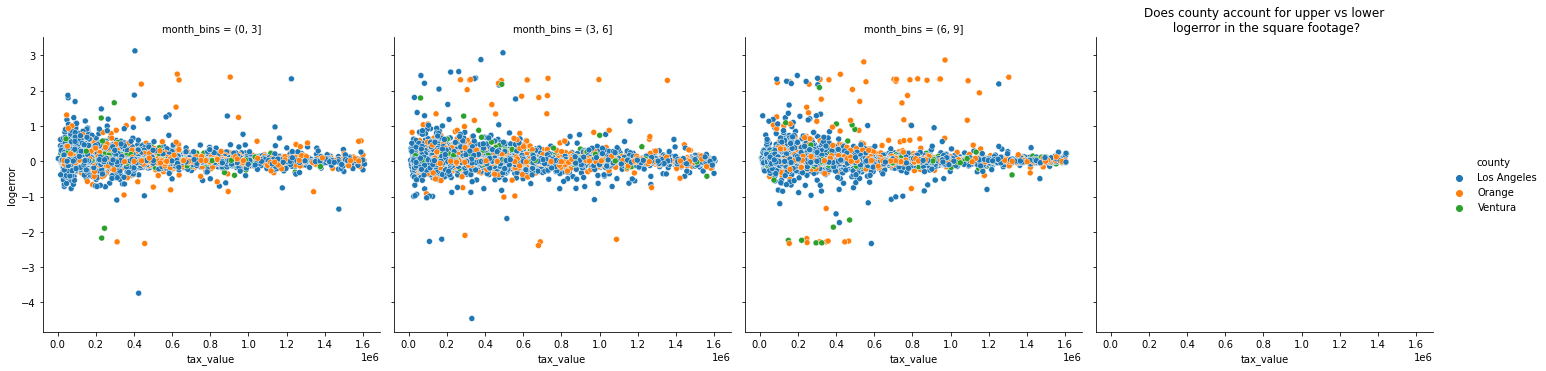

In [48]:
sns.relplot(
    x='tax_value',
    y='logerror',
    data=train,
    hue='county',
    col='month_bins',
)
plt.title("Does county account for upper vs lower\n logerror in the square footage?")

Text(0.5, 1.0, 'Does county account for upper vs lower\n logerror in the price of property?')

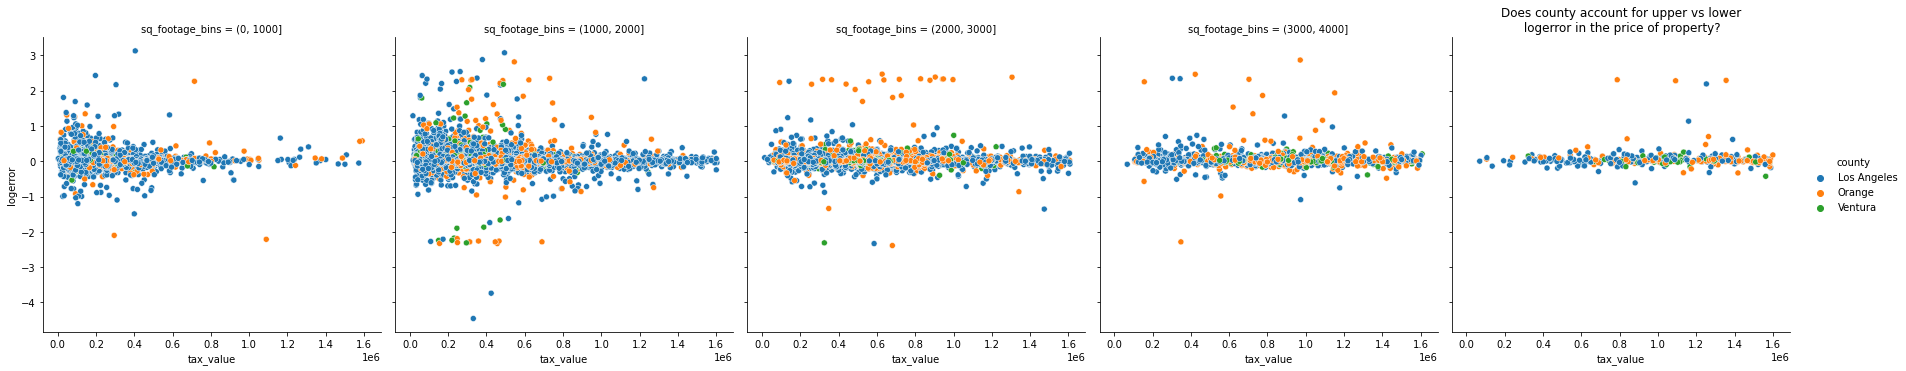

In [49]:
sns.relplot(
    x='tax_value',
    y='logerror',
    data=train,
    hue='county',
    col='sq_footage_bins',
)

plt.title("Does county account for upper vs lower\n logerror in the price of property?")

In [50]:
# County does seem to be grouped together for certain months and certain square footage

In [51]:
corr =  train.corr(method='pearson')

<AxesSubplot:>

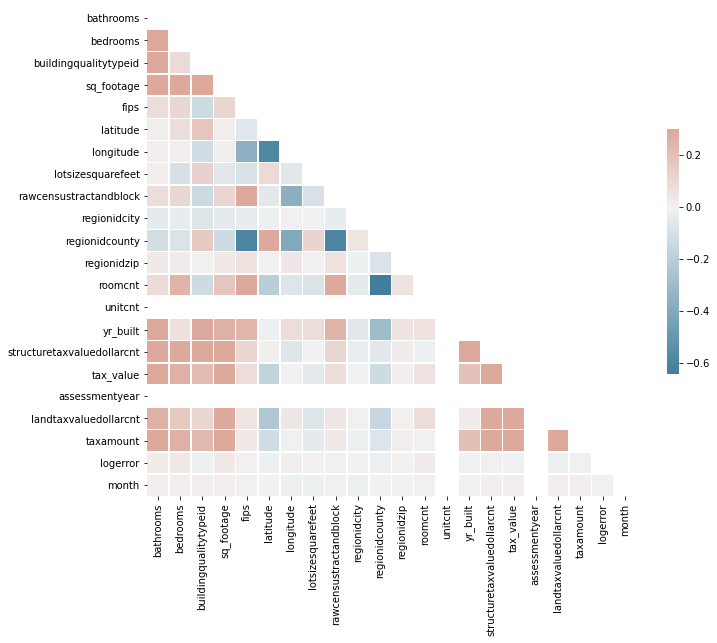

In [52]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
corr_log = train.corrwith(train["logerror"])
corr_log.max

<bound method NDFrame._add_numeric_operations.<locals>.max of bathrooms                     0.027558
bedrooms                      0.035392
buildingqualitytypeid        -0.013531
sq_footage                    0.036798
fips                          0.006574
latitude                     -0.011984
longitude                     0.015879
lotsizesquarefeet             0.007544
rawcensustractandblock        0.006598
regionidcity                 -0.002021
regionidcounty               -0.017465
regionidzip                   0.002730
roomcnt                       0.020787
unitcnt                            NaN
yr_built                      0.004309
structuretaxvaluedollarcnt    0.006424
tax_value                    -0.006590
assessmentyear                     NaN
landtaxvaluedollarcnt        -0.012332
taxamount                    -0.007145
logerror                      1.000000
month                         0.001169
dtype: float64>

In [54]:
print(corr_log.sort_values(ascending=False))

logerror                      1.000000
sq_footage                    0.036798
bedrooms                      0.035392
bathrooms                     0.027558
roomcnt                       0.020787
longitude                     0.015879
lotsizesquarefeet             0.007544
rawcensustractandblock        0.006598
fips                          0.006574
structuretaxvaluedollarcnt    0.006424
yr_built                      0.004309
regionidzip                   0.002730
month                         0.001169
regionidcity                 -0.002021
tax_value                    -0.006590
taxamount                    -0.007145
latitude                     -0.011984
landtaxvaluedollarcnt        -0.012332
buildingqualitytypeid        -0.013531
regionidcounty               -0.017465
unitcnt                            NaN
assessmentyear                     NaN
dtype: float64


### Question 5: Does log error differ for different number of bedrooms?

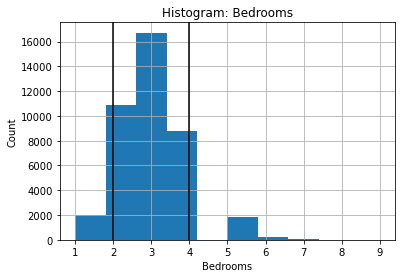

In [55]:
ax = train.bedrooms.hist()
plt.title('Histogram: Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
ax.axvline(2, color='black')
ax.axvline(4, color='black')


<AxesSubplot:title={'center':'Is there a relationship between log error and bedrooms?'}, xlabel='bedrooms', ylabel='logerror'>

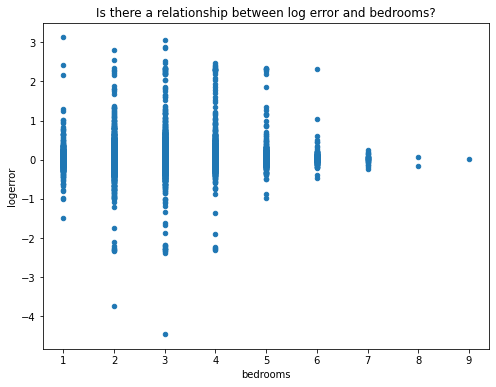

In [56]:
train.plot.scatter(
    y="logerror",
    x="bedrooms",
    title='Is there a relationship between log error and bedrooms?',
    figsize=(8, 6),
)

<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

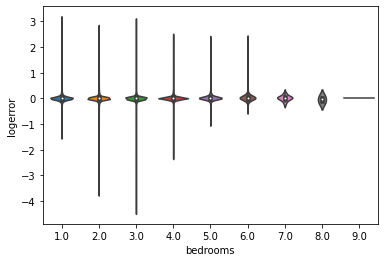

In [57]:
sns.violinplot(data=train, y='logerror', x='bedrooms')

### Levene's Test: test for equal variance
$H_0$: there is no difference in logerror variance for different number of bedrooms

$H_a$: there is a difference in logerror variance different number of bedrooms

In [58]:
stats.levene(
    train[train.bedrooms <= 5].logerror,
    train[train.month > 5].logerror,
)

LeveneResult(statistic=0.052954660926955895, pvalue=0.8180002577359538)

In [59]:
# We fail to reject the null hypothesis that there is no difference in logerror variance for different number of bedrooms.
#The variance is equal. 

### Is the log error the same for properties with  4 or less as those with more than 4 bedrooms?

$H_0$ : The logerror is the same for properties with 4 bedrooms or less as with those with more than 4 bedrooms.

$H_a$ : The logerror is not the same for properties with 4 bedrooms or less as with those with more than 4 bedrooms.

In [60]:
stats.ttest_ind(
   train[train.bedrooms <= 4].logerror,
    train[train.bedrooms > 4].logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-6.256198579620443, pvalue=3.984111118952614e-10)

### Conclusion:
We reject the null hypothesis that the logerror is the same for properties with 4 bedrooms or less compared to those with more than 4 bedrooms. The logerror is not the same for properties with 4 bedrooms or less compared to those with more than  bedrooms.

Text(0.5, 1.0, 'Does log error depend on number of bedrooms?')

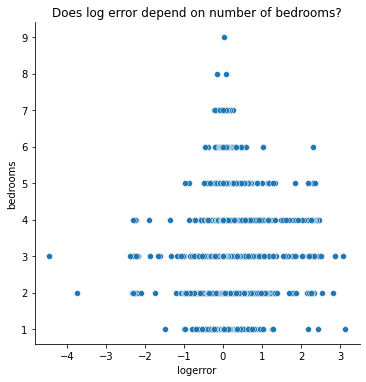

In [61]:
sns.relplot(
    y='bedrooms',
    x='logerror',
    data=train,
)
plt.title("Does log error depend on number of bedrooms?")